<h1><center>Laboratorio 7: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Gabriela Mora
- Nombre de alumno 2: Raúl Silva

### **Link de repositorio de GitHub:** `https://github.com/RaulSilvaA/MDS7202-mora-silva`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la fabricación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito. 
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [3]:
df_retail = pd.read_pickle("/content/drive/MyDrive/lab_progra/online_retail_II_cleaned.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Creación de nuevas Caracteristicas [2 Puntos] 

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**Ejemplo de Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

Antes de revisar el código, hay algunos supuestos que se tomaron para calcular algunas de las métricas. En las siguientes líneas se nombrarán los supuestos, si no se menciona la métrica es porque no se tomó ningún supuesto con respecto a ella:



*   Monetary: dado que no nos dan mucho contexto sobre la base de datos, se toma como supuesto que la cantidad gastada por línea de la boleta del cliente, es la multiplicación del precio por la cantidad comprada del producto. O sea, **price**x**quantity**
*   Frequency: se toma como visita distinta, al número de boletas distintas que posee un cliente. Aquí se asume que si un cliente tiene algunos minutos de diferencia entre una boleta y otra, quiere decir que al cliente se le olvidó un producto y vuelve a entrar a la tienda, por lo que se considera como otra visita.
*   Periodicity: para calcular la periodicidad, se tomo como unidad de medida el **minuto** en base a él se calculó la desviación estandar de la medida.





In [4]:
#se define la función de desviación estándar porque la que tiene pandas, deja como nulos cuando no hay más de un registro.
def std(x): 
  return np.std(x)

def custom_features(dataframe_in):
    #Se ocupa la función group by para calcular las métricas de monetary y de frecuency. 
    #para calcular las métricas que tienen como referencia la fecha actual, se crea una variable que contenga ese valor
    dataframe_in['gastado']=dataframe_in['Price']*dataframe_in['Quantity']
    prueba=pd.DataFrame(dataframe_in.groupby(['Customer ID'])\
                              .agg(min=("InvoiceDate",'min'),
                                   max=("InvoiceDate",'max'),
                                   Monetary=("gastado",'mean'),
                                   Frequency=('Invoice','size'))).reset_index()
    
    #se crea la variable fecha para calcular las metricas que las necesitan. estas son recency y length
    prueba['fecha actual']='2023-06-01 19:45:00'
    prueba['fecha actual'] = prueba['fecha actual'].astype('datetime64[ns]')
    prueba['Recency']= ((prueba['fecha actual'] - prueba['max']) / np.timedelta64(1, 'D')).round()
    prueba['Length'] = ((prueba['max'] - prueba['min']) / np.timedelta64(1, 'D')).round()  

    #Para la variable periodicity se crea un dataframe con valores únicos de las boletas y sus fechas, luego
    #se calculan la diferencia de en minutos por cada boleta
    df=dataframe_in[['Customer ID','Invoice', 'InvoiceDate']]
    df = df.drop_duplicates()
    df=df.sort_values(['Customer ID','Invoice'])
    df['difference']=df.groupby('Customer ID')['InvoiceDate'].diff(1)
    #se eliminan los valores na que se generan cuando no hay fecha anterior ni posterior a la que se quiere calcular
    df = df[df['difference'].notna()]
    #se pasa a minutos la cantudad de tiempo
    df['minutos'] = df['difference'].dt.total_seconds().div(60).astype(int)
    #se calula la desves de la variable minutos
    df_finalito=df.groupby('Customer ID')['minutos'].agg([std]).reset_index()
    #las variables que solo tenían un registro y no se les media la desves, se les intercambia por el valor 0
    df_finalito['Periodicity'] = df_finalito['std'].fillna(0)
    
    #se hace un cruce con la tabla generada por el otro groupby y se obtienen los valores de periodicity
    base_final=pd.merge(prueba, df_finalito, on='Customer ID', how='left')
    base_final=base_final[['Customer ID','Length','Recency', 'Monetary' ,'Frequency','Periodicity']]

    return base_final

In [5]:
custom_features(df_retail)

,Customer ID,Length,Recency,Monetary,Frequency,Periodicity
0,12346.0,196.0,4721.0,11.298788,33,50029.950790
1,12347.0,37.0,4559.0,18.638310,71,0.000000
2,12348.0,0.0,4630.0,11.108000,20,0.000000
3,12349.0,182.0,4599.0,26.187647,102,103734.500000
4,12351.0,0.0,4567.0,14.330000,21,0.000000
...,...,...,...,...,...,...
4309,18283.0,276.0,4574.0,2.854240,217,79758.996860
4310,18284.0,0.0,4623.0,16.488571,28,0.000000
4311,18285.0,0.0,4852.0,35.583333,12,0.000000
4312,18286.0,247.0,4668.0,19.349701,67,0.000000


In [6]:
custom_features(df_retail).mean()

<ipython-input-6-94bbf7477f2e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  custom_features(df_retail).mean()


Length           134.262170
Recency         4647.270746
Monetary          36.986943
Frequency         92.940890
Periodicity    24794.996477
dtype: float64

**Resúesta de Pauta:**

## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

In [8]:
class MinMax(BaseEstimator, TransformerMixin):
  
  def fit(self, X, y=None):
        return self

  def transform(self, X):
        max=np.max(X)
        min=np.min(X)
       
        return (X-min)/(max-min)

### 1.3.2 `T-SNE` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo. 

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior. 
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo `T-SNE` de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

lrmfp = FunctionTransformer(custom_features)
custom_f = ['Length', 'Recency',	'Monetary',	'Frequency',	'Periodicity']
preprocesador = ColumnTransformer(
    transformers=[
        ('MinMax', MinMax(), custom_f)
    ]
)

In [10]:
#Pipeline
pipeline = Pipeline([
    ('LRMFP', lrmfp),
    ('preproseso', preprocesador),
    ('dim_red', TSNE(n_components=2))
])

In [11]:
#Se aplica el pipeline a los datos
df_lrmfp=pipeline.fit_transform(df_retail)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [12]:
df_lrmfp

array([[ -2.9335806,  16.635927 ],
       [ -1.3319707, -37.190872 ],
       [-67.49716  , -21.650751 ],
       ...,
       [ -7.3683233,  44.54145  ],
       [  8.130657 ,   0.9167903],
       [ 12.582802 ,  20.643394 ]], dtype=float32)

In [13]:
#graficamos un scatter plot con los resultados
import plotly.express as px

component1 = df_lrmfp[:, 0]
component2 = df_lrmfp[:, 1]

df_features = pd.DataFrame({'Primera componente': component1, 'Segunda componente': component2})
fig = px.scatter(df_features, x='Primera componente', y='Segunda componente', title='Visualización de características post reducción de dim')
fig.show()

### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero **permutando el algoritmo de reducción de dimensionalidad por k-means.**

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

In [14]:
#Definimos algunas variables iniciales
k_val = range(1,21)

#Creamos el mismo pipeline, cambiando TSNE por k-means
pipeline_2 = Pipeline([
    ('LRMFP', lrmfp),
    ('preproseso', preprocesador),
    ('kmeans', KMeans())
])

In [15]:
#guardamos los valores de las inercias de cada cluster
inertias = []
for k in k_val:
    pipeline_2.set_params(kmeans__n_clusters=k)
    pipeline_2.fit(df_retail)
    inertias.append(pipeline_2.named_steps['kmeans'].inertia_)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/

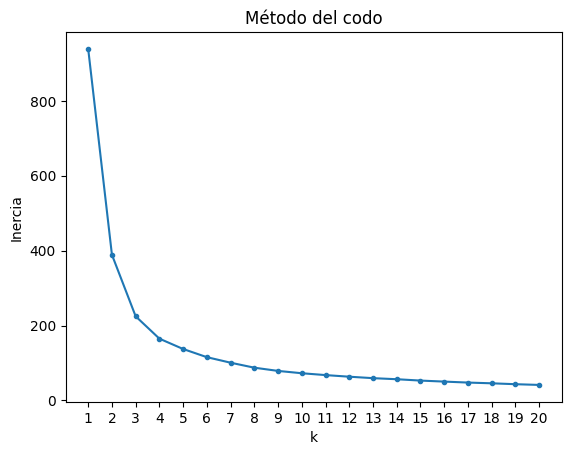

In [16]:
#Graficamos
import matplotlib.pyplot as plt
plt.plot(range(1, len(inertias) + 1), inertias, marker='.')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.xticks(range(1, len(inertias) + 1))
plt.show()

Como podemos observar, con 3 clusters hace que si se incrementa k no  disminuye de manera significativa la inercia de los clusters, es decir, no mejora en gran medida la distancia media intra-cluster. Es por esto que sería el valor a tener en fuenta

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


**Respuesta:**

In [17]:
k = 3
pipeline_2.set_params(kmeans__n_clusters=k)
pipeline_2.fit(df_retail)

labels = pipeline_2.predict(df_retail)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/

In [18]:
df_customer=custom_features(df_retail)

In [19]:
df_customer.shape

(4314, 6)

In [20]:

df_labeled = pd.DataFrame(data=df_customer, columns=custom_f) 
df_labeled['Cluster'] = labels

df_cluster = df_labeled.groupby('Cluster').mean() 

In [21]:
df_cluster

,Length,Recency,Monetary,Frequency,Periodicity
Cluster,,,,,
0,41.050188,4611.036386,32.462630,47.417817,5775.674375
1,278.471388,4593.041360,32.188487,169.134278,53343.437139
2,23.320419,4807.974869,53.406868,28.105759,3778.034868


Se pueden efectivamente observar 3 grandes grupos de clientes en promedio. Uno de ellos es el que posee una gran periodicidad y que han sido clientes fieles del local por mucho tiempo, a pesar de esto, no han invertido demasiado en el negocio (0).

Por otro lado tenemos los clientes nuevos, pero que han gastado bastante dinero en el negio (1), pero con una perioricidad primedio considerablemente baja, en comparación a sus pares.

Finalmente tenemos a clientes relativamente nuevos que no gastaron mucho dinero, pero que poseen el doble de perioricidad que sus pares del grupo anterior (2)

**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


In [22]:
fig = px.scatter(df_features, x='Primera componente', y='Segunda componente', title='Visualización de características post reducción de dim', color=labels)
fig.show()

**Respuesta:**

Como se puede apreciar en la visualización, si bien se pueden apreciar clusters, da la impresión de que una separación lineal no es la más correcta, ya que los clusters que se aprecian en la figura realemente siguen una estructura de circunferencia al rededor de una isla central. Sin embargo, el resultado es una división en colores un tanto incongruente con la figura, sobre todo con el cluster grande central.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por correo, Discord o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>